# <center>Profiles of the main quantities of the XNS 4.0 code</center>

In this notebook we plot the radial profile of the main outputs of the XNSmod code.

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

cwd = os.path.join(os.getcwd(),'stt','b-6_polo_pol2')
hydropath = os.path.join(cwd,'Hydroeq.dat')
hydromagpath = os.path.join(cwd,'Hydroeq_mag.dat')

rhounit = 6.2031e17 
bunit = 8.3758e19
runit = 1.47459

In [10]:
f = np.fromfile(os.path.join(cwd,'Grid.dat'),count=7,sep=' ')
    
NTH = int(f[0])
NR = int(f[1])

data = np.genfromtxt(os.path.join(cwd,'Grid.dat'), skip_header=1, usecols=0, unpack=True)

TH = data[0:NTH]
R = data[NTH:NTH+NR]

rho = np.genfromtxt(hydropath, skip_header=1, usecols=0, unpack=True).reshape(NTH,NR)
p = np.genfromtxt(hydropath, skip_header=1, usecols=1, unpack=True).reshape(NTH,NR)
psi = np.genfromtxt(hydropath, skip_header=1, usecols=2, unpack=True).reshape(NTH,NR)
alpha = np.genfromtxt(hydropath, skip_header=1, usecols=4, unpack=True).reshape(NTH,NR)
chi = np.genfromtxt(hydropath, skip_header=1, usecols=6, unpack=True).reshape(NTH,NR)

ascal2=np.exp(-2.0E-4*chi*2-6*chi**2)

def covterm(psi,R,TH,ascal2):
    GCOVR = psi**4*ascal2
    GCOVT = psi**4*np.square(R)*ascal2
    GCOVP = psi**4*np.square(R)*np.square(np.sin(TH))*ascal2
    return GCOVR,GCOVT,GCOVP

dataMag = np.genfromtxt(hydromagpath, skip_header=1, usecols=(0,1,2), unpack=True)

B2POL = np.zeros((NTH,NR))
B2 = np.zeros((NTH,NR))

b3 = dataMag[0].reshape(NTH,NR)
bpolr = dataMag[1].reshape(NTH,NR)
bpolt = dataMag[2].reshape(NTH,NR)

for i in range(0,NTH):
    for k in range(0,NR):
        GCOVR,GCOVT,GCOVP = covterm(psi[i,k],R[k],TH[i],ascal2[i,k])
        B2POL[i,k] = np.square(bpolr[i,k])*GCOVR + np.square(bpolt[i,k])*GCOVT
        B2TOR = np.square(b3[i,k])*GCOVP
        B2[i,k] = B2POL[i,k] + B2TOR
        
B = np.sqrt(B2)#/4.244674e-20 #Gauss unit
BPOL = np.sqrt(B2POL)#/4.244674e-20

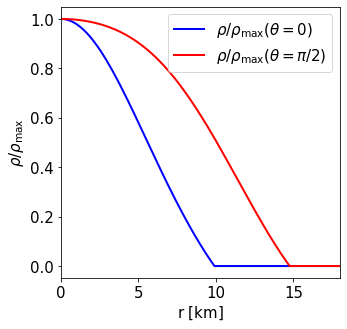

In [24]:
fig=plt.figure(figsize=(5,5))

plt.plot(R*runit,rho[0,:]/rho.max(),label='$\\rho / \\rho _\mathrm{max} (\\theta = 0)$',color='blue',linewidth=2)
plt.plot(R*runit,rho[int(NTH/2),:]/rho.max(),label='$\\rho / \\rho _\mathrm{max} (\\theta = \\pi /2)$',color='red',linewidth=2)

plt.xlabel('r $[$km$]$', fontsize=15)
plt.ylabel('$\\rho / \\rho _\mathrm{max}$', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(0,18)
plt.legend(fontsize=15)
filename = os.path.join(cwd,'rho_b-6_polo.png')
fig.savefig(filename, format='png', dpi=100, bbox_inches='tight')
plt.show()

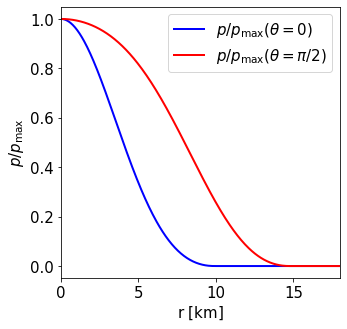

In [23]:
fig=plt.figure(figsize=(5,5))

plt.plot(R*runit,p[0,:]/p.max(),label='$p / p _\mathrm{max} (\\theta = 0)$',color='blue',linewidth=2)
plt.plot(R*runit,p[int(NTH/2),:]/p.max(),label='$p / p _\mathrm{max} (\\theta = \\pi /2)$',color='red',linewidth=2)

plt.xlabel('r $[$km$]$', fontsize=15)
plt.ylabel('$p / p _\mathrm{max}$', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(0,18)
plt.legend(fontsize=15)
filename = os.path.join(cwd,'p_b-6_polo.png')
fig.savefig(filename, format='png', dpi=100, bbox_inches='tight')
plt.show()

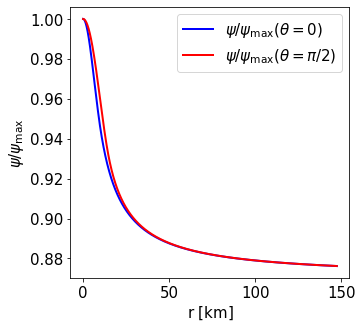

In [22]:
fig=plt.figure(figsize=(5,5))

plt.plot(R*runit,psi[0,:]/psi.max(),label='$\\psi / \\psi _\mathrm{max} (\\theta = 0)$',color='blue',linewidth=2)
plt.plot(R*runit,psi[int(NTH/2),:]/psi.max(),label='$\\psi / \\psi _\mathrm{max} (\\theta = \\pi /2)$',color='red',linewidth=2)

plt.xlabel('r $[$km$]$', fontsize=15)
plt.ylabel('$\\psi / \\psi _\mathrm{max}$', fontsize=15)
plt.tick_params(labelsize=15)
# plt.xlim(0,100)
plt.legend(fontsize=15)
filename = os.path.join(cwd,'psi_b-6_polo.png')
fig.savefig(filename, format='png', dpi=100, bbox_inches='tight')
plt.show()

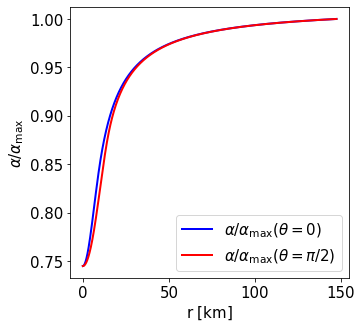

In [21]:
fig=plt.figure(figsize=(5,5))

plt.plot(R*runit,alpha[0,:]/alpha.max(),label='$\\alpha / \\alpha _\mathrm{max} (\\theta = 0)$',color='blue',linewidth=2)
plt.plot(R*runit,alpha[int(NTH/2),:]/alpha.max(),label='$\\alpha / \\alpha _\mathrm{max} (\\theta = \\pi /2)$',color='red',linewidth=2)

plt.xlabel('r $[$km$]$', fontsize=15)
plt.ylabel('$\\alpha / \\alpha _\mathrm{max}$', fontsize=15)
plt.tick_params(labelsize=15)
# plt.xlim(0,100)
plt.legend(fontsize=15)
filename = os.path.join(cwd,'alpha_b-6_polo.png')
fig.savefig(filename, format='png', dpi=100, bbox_inches='tight')
plt.show()

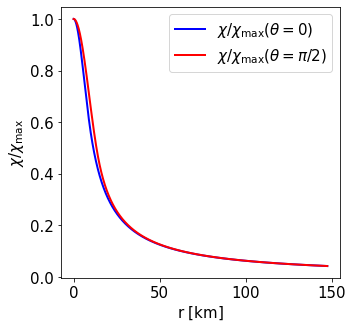

In [20]:
fig=plt.figure(figsize=(5,5))

plt.plot(R*runit,chi[0,:]/chi.max(),label='$\\chi / \\chi _\mathrm{max} (\\theta = 0)$',color='blue',linewidth=2)
plt.plot(R*runit,chi[int(NTH/2),:]/chi.max(),label='$\\chi / \\chi _\mathrm{max} (\\theta = \\pi /2)$',color='red',linewidth=2)

plt.xlabel('r $[$km$]$', fontsize=15)
plt.ylabel('$\\chi / \\chi _\mathrm{max}$', fontsize=15)
plt.tick_params(labelsize=15)
# plt.xlim(0,100)
plt.legend(fontsize=15)
filename = os.path.join(cwd,'chi_b-6_polo.png')
fig.savefig(filename, format='png', dpi=100, bbox_inches='tight')
plt.show()

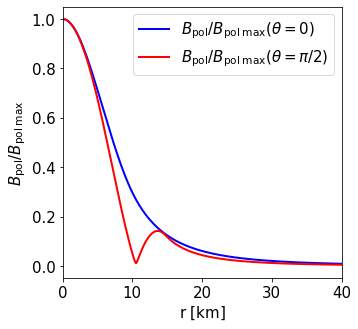

In [19]:
fig=plt.figure(figsize=(5,5))

plt.plot(R*runit,BPOL[0,:]/BPOL.max(),label='$B_\mathrm{pol} / B_\mathrm{pol\;max} (\\theta = 0)$',color='blue',linewidth=2)
plt.plot(R*runit,BPOL[int(NTH/2),:]/BPOL.max(),label='$B_\mathrm{pol} / B_\mathrm{pol\;max}(\\theta = \\pi /2)$',color='red',linewidth=2)

plt.xlabel('r $[$km$]$', fontsize=15)
plt.ylabel('$B_\mathrm{pol} / B_\mathrm{pol\;max}$', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(0,40)
plt.legend(fontsize=15)
filename = os.path.join(cwd,'bpol_b-6_polo.png')
fig.savefig(filename, format='png', dpi=100, bbox_inches='tight')
plt.show()

In [11]:
1.4e-3*rhounit/1.0e14

8.68434